In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('quora question pairs.csv')

In [12]:
new_df = df.sample(30000, random_state=2)

In [13]:
new_df['is_duplicate'].value_counts()

0    19013
1    10987
Name: is_duplicate, dtype: int64

In [14]:
def preprocess(q):
    
    q = str(q).lower().strip()
        
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

# Basic Feature engineering

In [15]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [16]:
new_df.head(3)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  is_duplicate  
398782  what is the best marketing automation tool for...             1  
115086  i am quite poor and i want to be very rich  wh...             0  
327711  t i e t to thapar university to thapar univers...             0

In [17]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [18]:
new_df.shape

(30000, 8)

In [19]:
new_df['q1_word'] = new_df['question1'].apply(lambda row: len(row.split(' ')))
new_df['q2_word'] = new_df['question2'].apply(lambda row: len(row.split(' ')))

In [20]:
new_df.shape

(30000, 10)

In [21]:
new_df['total_word'] = new_df['q1_word'] + new_df['q2_word']

In [22]:
new_df.shape

(30000, 11)

In [23]:
def common_word(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [24]:
new_df['common_word'] = new_df.apply(common_word, axis=1)

In [25]:
new_df.shape

(30000, 12)

In [26]:
new_df['word_share'] = round(new_df['common_word']/ new_df['total_word'], 2)

In [27]:
new_df.shape

(30000, 13)

In [28]:
new_df.head(3)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   

        q1_len  q2_len  q1_word  q2_word  total_word  common_word  word_share  
398782      75      76       13       13          26           12        0.46  
115086      48      56       13       16          29            8        0.28  
327711     104     119       28       21          49            4        0.08

# Advanced Feature Engineering

# (1) Token features

In [29]:
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')
STOP_WORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [31]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df['cwc_min'] = list(map(lambda x:x[0], token_features))
new_df['cwc_max'] = list(map(lambda x:x[1], token_features))
new_df['csc_min'] = list(map(lambda x:x[2], token_features))
new_df['csc_max'] = list(map(lambda x:x[3], token_features))
new_df['ctc_min'] = list(map(lambda x:x[4], token_features))
new_df['ctc_max'] = list(map(lambda x:x[5], token_features))
new_df['last_word_equal'] = list(map(lambda x:x[6], token_features))
new_df['first_word_equal'] = list(map(lambda x:x[7], token_features))

In [32]:
new_df.head(3)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   

        q1_len  q2_len  q1_word  q2_word  ...  common_word  word_share  \
398782      75      76       13       13  ...           12        0.46   
115086      48      56       13       16  ...            8        0.28   
327711     104     119       28       21  ...            4        0.08   

         cwc_min   cwc_max   csc_min   csc_max   ctc_min   ctc_max  \
398782  0.874989  0.874989  0.999980  0.999980  0.923070  0.923070   
115086  0.666644  0.499988  0.714276  0.624992  0.583328  0.466664   
327711  0.000000  0.000000  0.428565  0.272725  0.149999  0.115384   

        last_word_equal  first_word_equal  
398782              1.0               1.0  
115086              1.0               1.0  
327711              0.0               0.0  

[3 rows x 21 columns]

# (2) Length features

In [33]:
!pip install distance

In [34]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0] * 3
    
    q1_tokens = q1.split(' ')
    q2_tokens = q2.split(' ')
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    #absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #average token length of questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    #largest common substring
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs)/(min(len(q1) , len(q2)) + 1)
    
    return length_features
    

In [35]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len'] = list(map(lambda x:x[0], length_features))
new_df['avg_len'] = list(map(lambda x:x[1], length_features))
new_df['max_substr_ratio'] = list(map(lambda x:x[2], length_features))

In [36]:
new_df.head(3)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   

        q1_len  q2_len  q1_word  q2_word  ...   cwc_max   csc_min   csc_max  \
398782      75      76       13       13  ...  0.874989  0.999980  0.999980   
115086      48      56       13       16  ...  0.499988  0.714276  0.624992   
327711     104     119       28       21  ...  0.000000  0.428565  0.272725   

         ctc_min   ctc_max  last_word_equal  first_word_equal  abs_len  \
398782  0.923070  0.923070              1.0               1.0        0   
115086  0.583328  0.466664              1.0               1.0        3   
327711  0.149999  0.115384              0.0               0.0        7   

        avg_len  max_substr_ratio  
398782     13.0          0.013158  
115086     14.5          0.020408  
327711     24.5          0.028571  

[3 rows x 24 columns]

# Fuzzy wuzzy Features

In [37]:
!pip install fuzzywuzzy

In [38]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0] * 4
    
    #first fuzzy features
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    #second fuzzy features
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)
    
    #third fuzzy features
    fuzzy_features[2] = fuzz.partial_token_sort_ratio(q1, q2)
    
    #fourth fuzzy features
    fuzzy_features[3] = fuzz.partial_token_set_ratio(q1, q2)
    
    return fuzzy_features    

In [39]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

new_df['qr_ratio'] = list(map(lambda x:x[0], fuzzy_features))
new_df['partial_ratio'] = list(map(lambda x:x[1], fuzzy_features))
new_df['partial_token_sort_ratio'] = list(map(lambda x:x[2], fuzzy_features))
new_df['partial_token_set_ratio'] = list(map(lambda x:x[3], fuzzy_features))

In [41]:
new_df.head(3)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   

        q1_len  q2_len  q1_word  q2_word  ...   ctc_max  last_word_equal  \
398782      75      76       13       13  ...  0.923070              1.0   
115086      48      56       13       16  ...  0.466664              1.0   
327711     104     119       28       21  ...  0.115384              0.0   

        first_word_equal  abs_len  avg_len  max_substr_ratio  qr_ratio  \
398782               1.0        0     13.0          0.013158        99   
115086               1.0        3     14.5          0.020408        69   
327711               0.0        7     24.5          0.028571        26   

        partial_ratio  partial_token_sort_ratio  partial_token_set_ratio  
398782             99                        99                      100  
115086             67                        64                      100  
327711             29                        35                      100  

[3 rows x 28 columns]

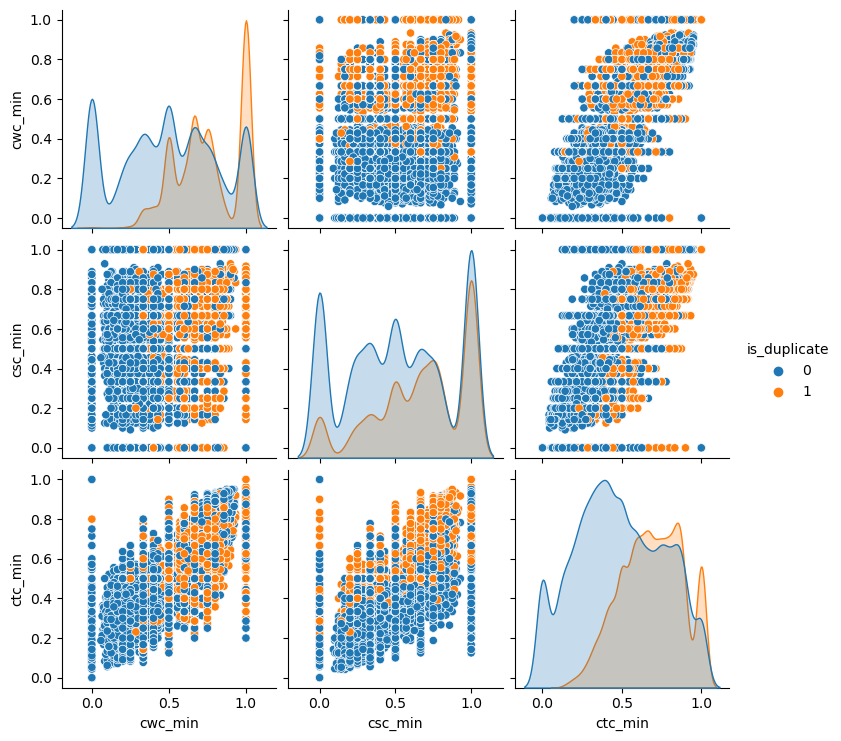

In [42]:
sns.pairplot(new_df[['cwc_min', 'csc_min', 'ctc_min', 'is_duplicate']], hue='is_duplicate')

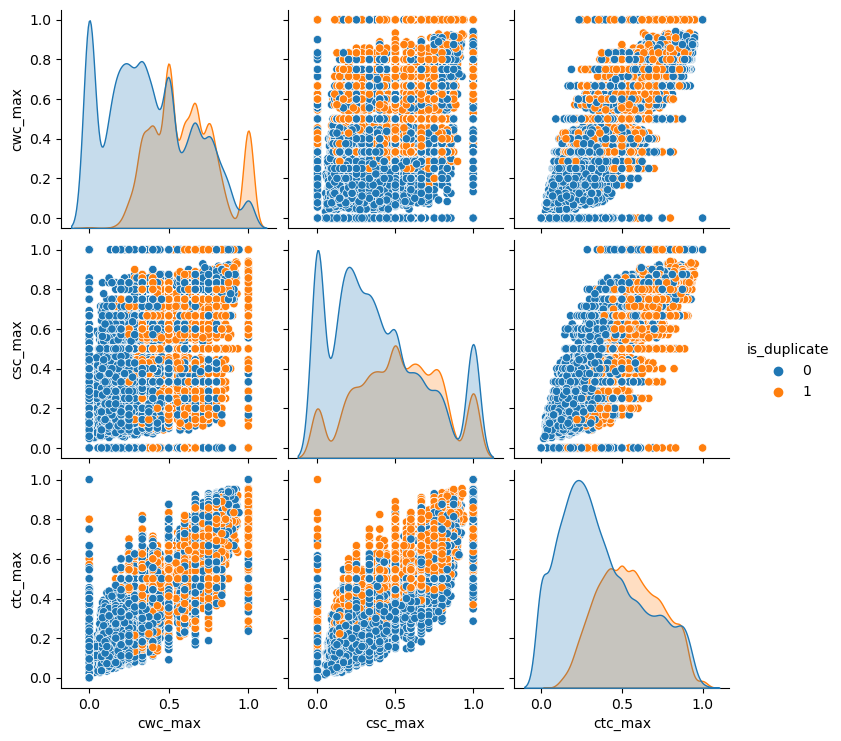

In [43]:
sns.pairplot(new_df[['cwc_max', 'csc_max', 'ctc_max', 'is_duplicate']], hue='is_duplicate')
plt.show()

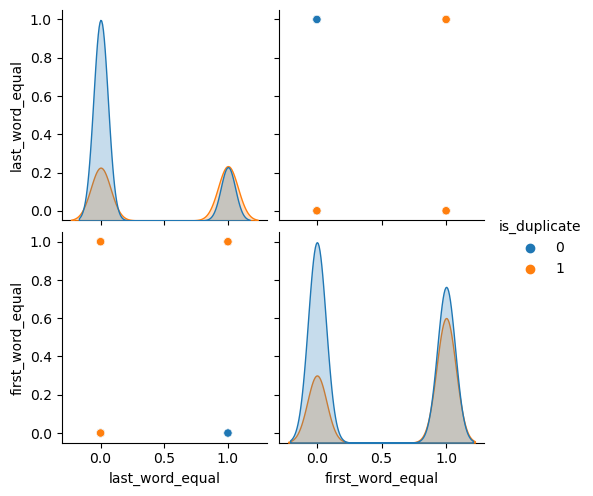

In [44]:
sns.pairplot(new_df[['last_word_equal', 'first_word_equal', 'is_duplicate']], hue='is_duplicate')
plt.show()

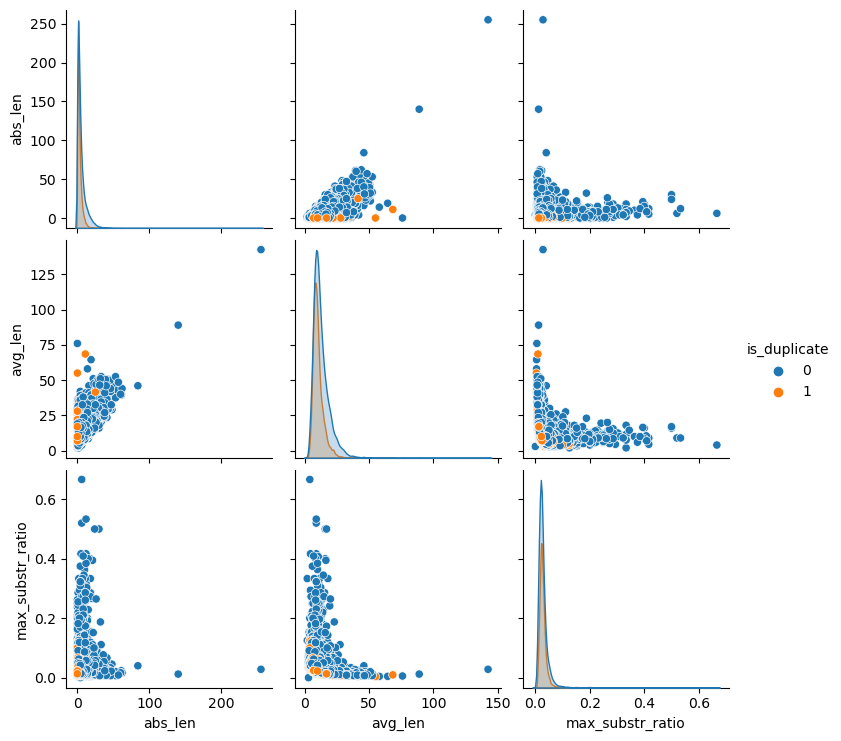

In [45]:
sns.pairplot(new_df[['abs_len', 'avg_len', 'max_substr_ratio', 'is_duplicate']], hue='is_duplicate')
plt.show()

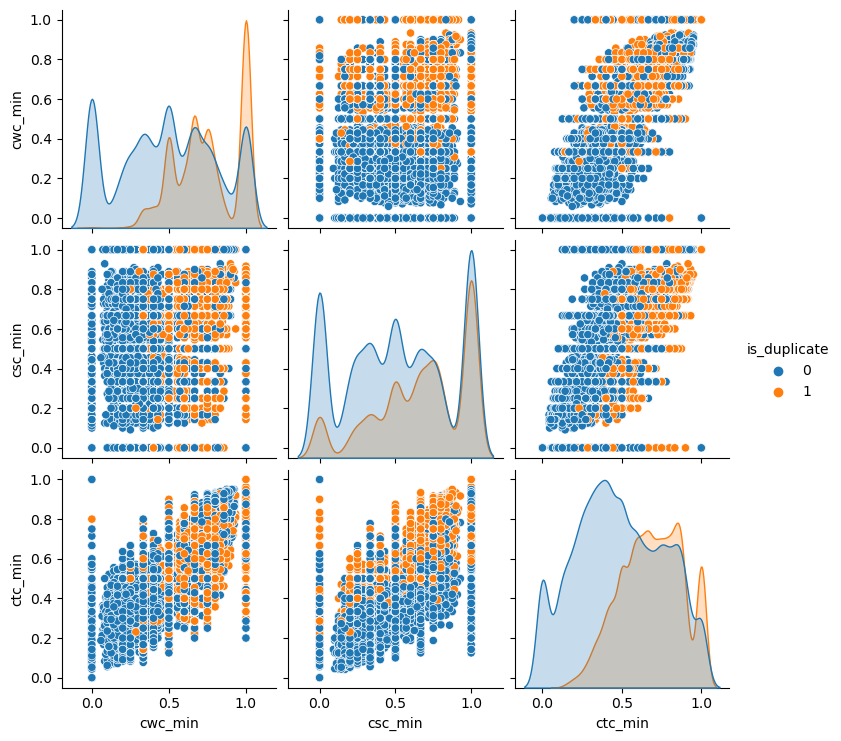

In [46]:
sns.pairplot(new_df[['cwc_min', 'csc_min', 'ctc_min', 'is_duplicate']], hue='is_duplicate')
plt.show()

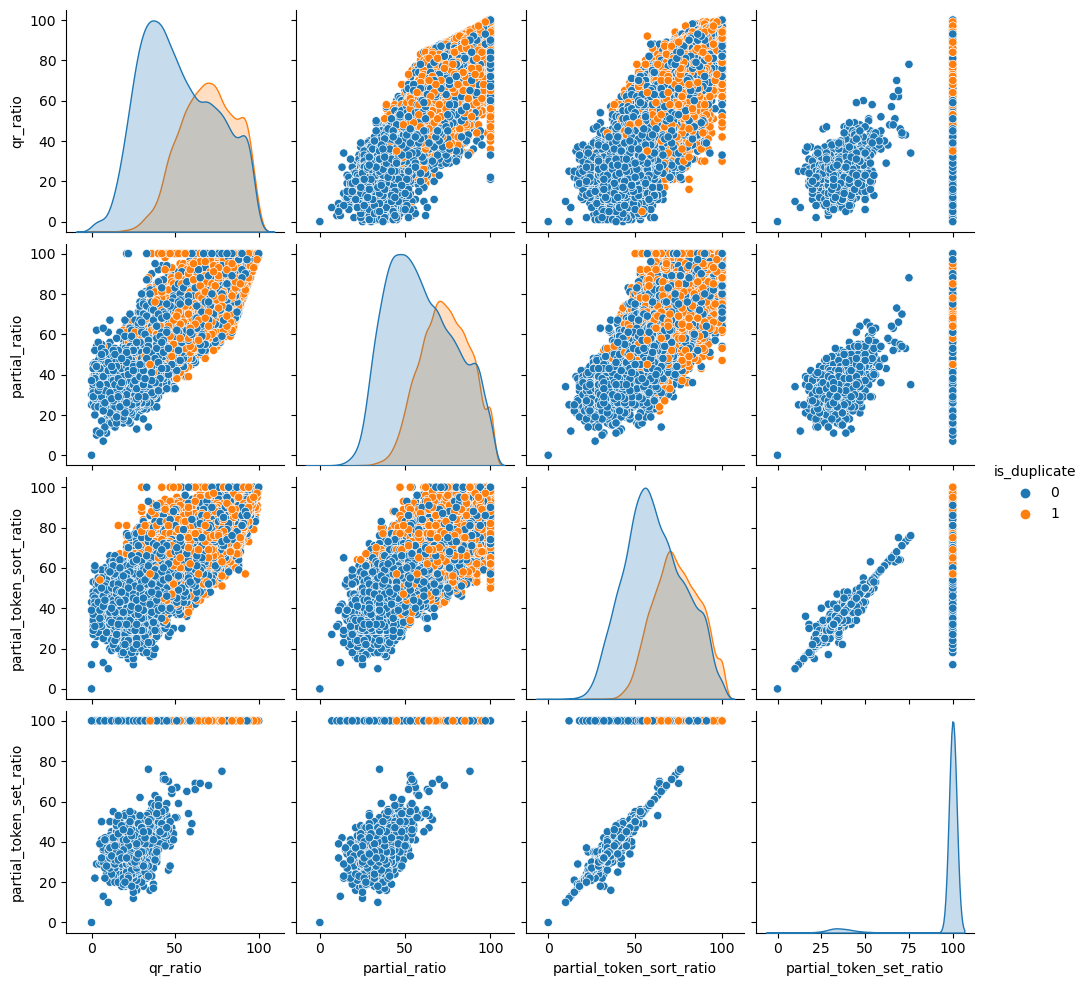

In [47]:
sns.pairplot(new_df[['qr_ratio', 'partial_ratio', 'partial_token_sort_ratio' , 'partial_token_set_ratio', 'is_duplicate']], hue='is_duplicate')
plt.show()

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 398782 to 312470
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        30000 non-null  int64  
 1   qid1                      30000 non-null  int64  
 2   qid2                      30000 non-null  int64  
 3   question1                 30000 non-null  object 
 4   question2                 30000 non-null  object 
 5   is_duplicate              30000 non-null  int64  
 6   q1_len                    30000 non-null  int64  
 7   q2_len                    30000 non-null  int64  
 8   q1_word                   30000 non-null  int64  
 9   q2_word                   30000 non-null  int64  
 10  total_word                30000 non-null  int64  
 11  common_word               30000 non-null  int64  
 12  word_share                30000 non-null  float64
 13  cwc_min                   30000 non-null  float64
 14  

In [49]:
# applying min max scaling on the made features

from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
X = mn.fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_equal', 'first_word_equal' , 'abs_len', 'avg_len', 'max_substr_ratio', 'qr_ratio', 'partial_ratio', 'partial_token_sort_ratio', 'partial_token_set_ratio']])
y = new_df['is_duplicate'].values

In [50]:
X.shape

(30000, 15)

In [41]:
from sklearn.manifold import TSNE

tsne2D = TSNE(
    n_components=2,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.270s...
[t-SNE] Computed neighbors for 30000 samples in 10.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

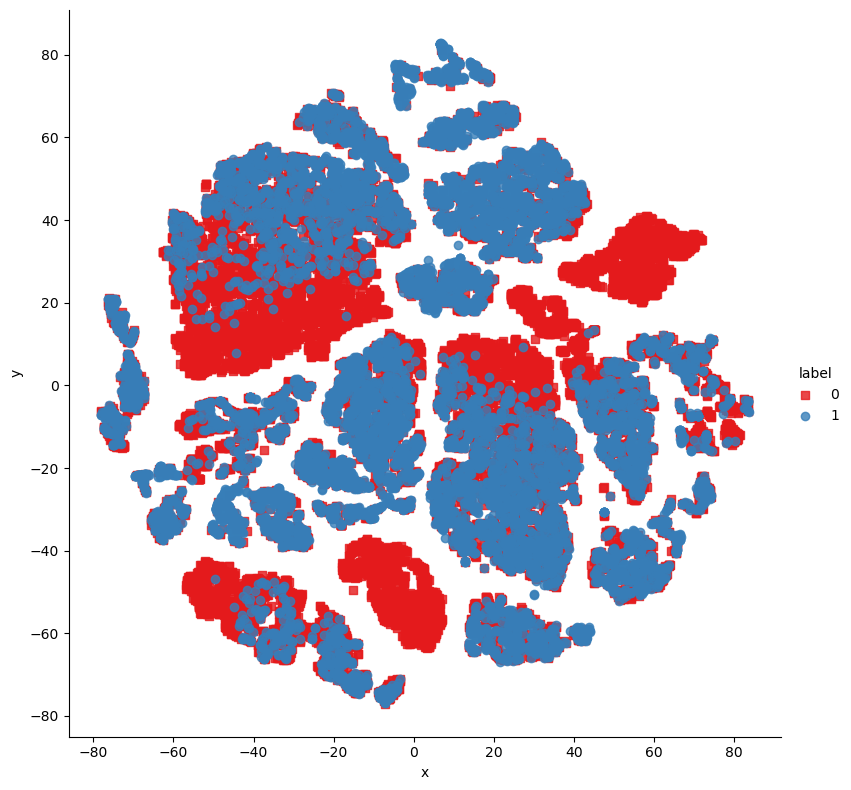

In [42]:
x_df = pd.DataFrame({'x':tsne2D[:,0], 'y':tsne2D[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
#plt.figure(figsize=(6, 6))
plt.show()

In [43]:
tsne3D = TSNE(
    n_components=3,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.314s...
[t-SNE] Computed neighbors for 30000 samples in 8.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [44]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3D[:,0],
    y=tsne3D[:,1],
    z=tsne3D[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [51]:
ques_df = new_df[['question1', 'question2']]
ques_df.head(3)

question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich  wh...  
327711  t i e t to thapar university to thapar univers...

In [52]:
final_df = new_df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])
final_df.head(3)

is_duplicate  q1_len  q2_len  q1_word  q2_word  total_word  \
398782             1      75      76       13       13          26   
115086             0      48      56       13       16          29   
327711             0     104     119       28       21          49   

        common_word  word_share   cwc_min   cwc_max  ...   ctc_max  \
398782           12        0.46  0.874989  0.874989  ...  0.923070   
115086            8        0.28  0.666644  0.499988  ...  0.466664   
327711            4        0.08  0.000000  0.000000  ...  0.115384   

        last_word_equal  first_word_equal  abs_len  avg_len  max_substr_ratio  \
398782              1.0               1.0        0     13.0          0.013158   
115086              1.0               1.0        3     14.5          0.020408   
327711              0.0               0.0        7     24.5          0.028571   

        qr_ratio  partial_ratio  partial_token_sort_ratio  \
398782        99             99                        99   
115086        69             67                        64   
327711        26             29                        35   

        partial_token_set_ratio  
398782                      100  
115086                      100  
327711                      100  

[3 rows x 23 columns]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

questions = list(ques_df['question1']) + list(ques_df['question2'])
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [54]:
q1_arr.shape

(30000, 3000)

In [55]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [56]:
df = pd.concat([final_df, temp_df], axis=1)
df.shape

(30000, 6023)

In [57]:
df.head(3)

is_duplicate  q1_len  q2_len  q1_word  q2_word  total_word  \
398782             1      75      76       13       13          26   
115086             0      48      56       13       16          29   
327711             0     104     119       28       21          49   

        common_word  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
398782           12        0.46  0.874989  0.874989  ...     0     0     0   
115086            8        0.28  0.666644  0.499988  ...     0     0     0   
327711            4        0.08  0.000000  0.000000  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
398782     0     0     0     0     0     0     0  
115086     0     0     0     0     0     0     0  
327711     0     0     0     0     0     0     0  

[3 rows x 6023 columns]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:].values , df.iloc[:,0].values , test_size=0.2, random_state=42)

In [59]:
X_train.shape

(24000, 6022)

In [60]:
y_test.shape

(6000,)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7838333333333334

In [62]:
confusion_matrix(y_test, y_pred)

array([[3261,  538],
       [ 759, 1442]], dtype=int64)

In [63]:
from xgboost import XGBClassifier
xg = XGBClassifier()

xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

accuracy_score(y_test, y_pred_xg)

0.7916666666666666

In [64]:
confusion_matrix(y_test, y_pred_xg)

array([[3209,  590],
       [ 660, 1541]], dtype=int64)

# Testing Phase

In [74]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [75]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [76]:
def test_fetch_length_features(q1, q2):
    
    length_features = [0.0] * 3
    
    q1_tokens = q1.split(' ')
    q2_tokens = q2.split(' ')
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    #absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #average token length of questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    #largest common substring
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs)/(min(len(q1) , len(q2)) + 1)
    
    return length_features

In [77]:
def test_fetch_token_features(q1, q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [82]:
def test_fetch_fuzzy_features(q1, q2):
    
    fuzzy_features = [0.0] * 4
    
    #first fuzzy features
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    #second fuzzy features
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)
    
    #third fuzzy features
    fuzzy_features[2] = fuzz.partial_token_sort_ratio(q1, q2)
    
    #fourth fuzzy features
    fuzzy_features[3] = fuzz.partial_token_set_ratio(q1, q2)
    
    return fuzzy_features    

In [79]:
def query_point_creator(q1, q2):
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))    

In [90]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [91]:
rf.predict(query_point_creator(q5,q6))

array([0], dtype=int64)

In [92]:
cv

CountVectorizer(max_features=3000)

In [93]:
rf

RandomForestClassifier()

In [94]:
import pickle

pickle.dump(rf, open('model.pkl', 'wb'))
pickle.dump(cv, open('cv.pkl', 'wb'))